## Importing libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Normalizer

## reading the original data 

In [8]:
df_ori = pd.read_excel("ENB2012_data.xlsx")
Y1 = df_ori.iloc[:,8].values  # Y1 is heating load
Y2 = df_ori.iloc[:,9].values  # Y2 is cooling load
X = df_ori.iloc[:,[1, 2, 3, 4, 5, 6, 7]].values

## Correlation matrix for original data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


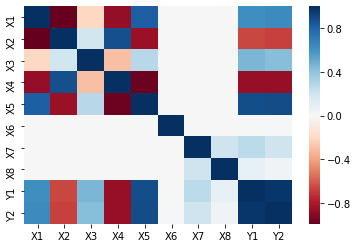

In [9]:
corrmat = df_ori.corr()
# to find the correlation matrix for features only
display(corrmat)

# also we can find the heatmap to get better visual idea
sns.heatmap(corrmat, xticklabels = corrmat.columns, yticklabels = corrmat.columns, cmap = 'RdBu')

## Reading imputed data

In [53]:
df = pd.read_csv('imputed_data_simple.csv')
Y1 = df.iloc[:,8].values  # Y1 is heating load
Y2 = df.iloc[:,9].values  # Y2 is cooling load
X = df.iloc[:,[0,1,2,3, 4, 5, 6, 7]].values

## VIF for imputed data

In [55]:
# Finding the VIF for all the features
VX = sm.tools.add_constant(df)
#create series for both
series = pd.Series([variance_inflation_factor(VX.values, i) for i in range(VX.shape[1])],index = VX.columns)
print('VIF DATA')
print('-'*100)
display(series)

VIF DATA
----------------------------------------------------------------------------------------------------


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    1402.521983
X1          5.491314
X2          6.513736
X3          2.576616
X4          4.996355
X5          6.821018
X6          1.014001
X7          1.024634
X8          1.071561
Y1         24.293891
Y2         22.680645
dtype: float64

## Splitting in training and testing sets for heating load

In [57]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y1, test_size=0.2, random_state = 0 )

## Splitting in training and testing sets for Cooling load

In [58]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X, Y2, test_size=0.2, random_state = 0)

# Can we reduce data ???

In [151]:
pca = PCA(n_components = 1)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.76878787])

In [153]:
## Trying to reduce after normalizing
X_norm = Normalizer().fit_transform(X)
X_reduced = pca.fit_transform(X_norm)
pca.explained_variance_ratio_

array([0.87651375])

###### still the variance explained is very less so we can not reduce the data

# Fitting imputed Data

# 1) KNN regressor

###### for heating data

In [83]:
from sklearn.model_selection import cross_val_score
scores_knn=[]
k_red1=[]
for i in range(30):
    regr_heat_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_heat_KNN,X, Y1,cv=10)
    scores_knn.append(scores1.mean())
    k_red1.append(i+1)

Thus maximum Cross_val_score = 0.8549001303838498 is for k = 3 for heating load .


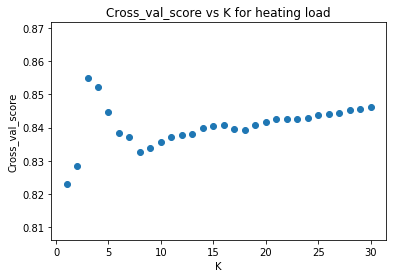

In [93]:
plt.scatter(k_red1,scores_knn )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for heating load")
print(f'Thus maximum Cross_val_score = {scores_knn[scores_knn.index(np.max(scores_knn))]} is for k = {scores_knn.index(np.max(scores_knn)) + 1} for heating load .')

###### For cooling data

In [94]:
scores_knn1=[]
k_red2=[]
for i in range(30):
    regr_cool_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_cool_KNN,X, Y2,cv=10)
    scores_knn1.append(scores1.mean())
    k_red2.append(i+1)

Thus maximum Cross_val_score = 0.8960873927099087 is for k = 3 for cooling load .


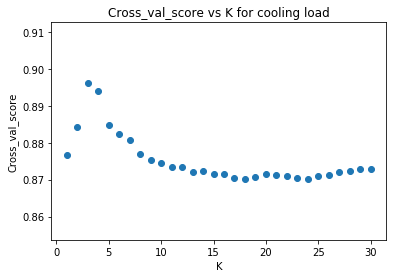

In [95]:
plt.scatter(k_red2,scores_knn1 )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for cooling load")
print(f'Thus maximum Cross_val_score = {scores_knn1[scores_knn1.index(np.max(scores_knn1)) ]} is for k = {scores_knn1.index(np.max(scores_knn1)) + 1} for cooling load .')

In [87]:
# fitting KNN for both with optimum K
Reg_heat_KNN = KNN(n_neighbors =scores_knn.index(np.max(scores_knn)) + 1)
Reg_heat_KNN.fit(X1_train,y1_train)

Reg_cool_KNN = KNN(n_neighbors = scores_knn.index(np.max(scores_knn)) + 1)
Reg_cool_KNN.fit(X2_train,y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

###### Accuracy for both

## KNN score

In [88]:
print(f'Accuracy for heating data model is {Reg_heat_KNN.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_KNN.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.8920060777732547
Accuracy for cooling data model is 0.9179193677837663


## RMSE value

In [89]:
import math
from sklearn.metrics import r2_score
Y1_predict = Reg_heat_KNN.predict(X1_test)
Y2_predict = Reg_cool_KNN.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 3.4533123463735746
Cooling RMSE: 2.7785143626571487


## r2_score

In [90]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.8920060777732547
Cooling r2_score: 0.9179193677837663


## Cross_val_score

In [91]:
# For heating load
from sklearn.model_selection import cross_val_score
Regr_heat_KNN = KNN(n_neighbors = 4)
scores1 = cross_val_score(Regr_heat_KNN,X1_test, y1_test,cv=10)
print(f'Cross val score of KNN with Heating Load: {scores1.mean()}')

# For cooling load
Regr_cool_KNN = KNN(n_neighbors = 4)
scores2 = cross_val_score(Regr_cool_KNN,X2_test, y2_test,cv=10)
print(f'Cross val score of KNN with Cooling Load: {scores2.mean()}')

Cross val score of KNN with Heating Load: 0.8488452584944302
Cross val score of KNN with Cooling Load: 0.8666014306202905


# 2) Decision Tree Regressor

###### For heating data

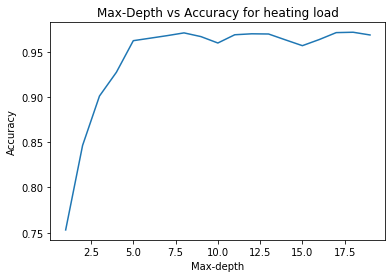

maximum accuracy is 0.9714934815190811 for depth with 18


In [100]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for depth with {dep1[index]}")

In [101]:
# since maximum accuracy is with optimum depth
Reg_heat_DTR = DTR(max_depth = dep1[index])
Reg_heat_DTR.fit(X1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=18, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### For cooling data

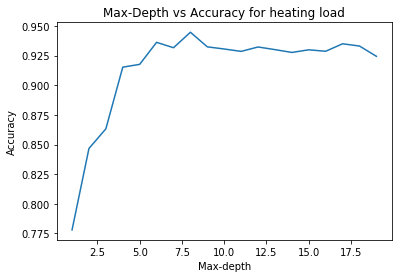

maximum accuracy is 0.9446250623049983 for split with 8


In [102]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [103]:
# since maximum accuracy is with optimum depth
Reg_cool_DTR = DTR(max_depth = dep2[index])
Reg_cool_DTR.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### Accuracy for both

## Decision Tree score

In [104]:
print(f'Accuracy for heating data model is {Reg_heat_DTR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_DTR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9685727162266244
Accuracy for cooling data model is 0.9367833925360879


## RMSE value

In [105]:
Y1_predict = Reg_heat_DTR.predict(X1_test)
Y2_predict = Reg_cool_DTR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 1.862900364011389
Cooling RMSE: 2.4384165226328305


## r2_score

In [106]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9685727162266246
Cooling r2_score: 0.9367833925360879


# 3) Random Forest Regressor

###### For heating data

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

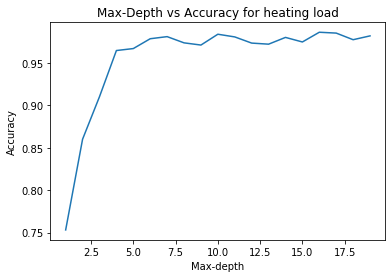

maximum accuracy is 0.9862425025261904 for split with 16


In [108]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep1[index]}")

In [109]:
Reg_heat_RFR = RFR(max_depth = dep1[index])
Reg_heat_RFR.fit(X1_train,y1_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### For cooling data

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

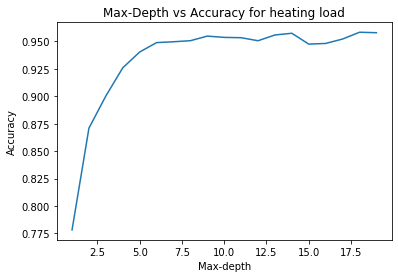

maximum accuracy is 0.9583565941294387 for split with 18


In [110]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [111]:
Reg_cool_RFR = RFR(max_depth = dep2[index])
Reg_cool_RFR.fit(X2_train,y2_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### Accuracy for both

## Random forest score

In [112]:
print(f'Accuracy for heating data model is {Reg_heat_RFR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_RFR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.981747518583635
Accuracy for cooling data model is 0.9586291563530598


## RMSE value

In [113]:
Y1_predict = Reg_heat_RFR.predict(X1_test)
Y2_predict = Reg_cool_RFR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 1.4197018933473415
Cooling RMSE: 1.9726020869669822


## r2_score

In [114]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9817475185836351
Cooling r2_score: 0.9586291563530598
